# Sensor Based Activity Recoginition 
Challenge: cdl1 - Sensor based Activity Recognition  
Team: Lea Bütler, Manjavy Kirupa, Etienne Roulet, Si Ben Tran  

Aufgabe: Explorative Datenanlyse mittels Pandas Profiling

In diesem Notebook wird explorative Datenanalyse auf den gesammelten Daten durchgeführt.

---

In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Daten einlesen

In [21]:
# read in the data
df = pd.read_csv('Alle_Messungen_trimmed.csv')
df.head()

,Unnamed: 0,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,1,2023-02-27 15:02:17.156,0.000,9.722,1.278,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.21775,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
1,2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.42065,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,3,2023-02-27 15:02:16.685,0.000,0.000,0.000,0.0,0.0,0.0,0.000000,43.5,-13.143750,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,4,2023-02-27 15:02:32.295,0.000,0.000,0.000,0.0,0.0,0.0,-13.012501,0.0,20.587502,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,5,2023-02-27 15:02:33.285,0.000,0.000,0.000,0.0,0.0,0.0,-22.612501,0.0,20.268751,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


# Plots für verschiedene Sensoren und verschiedene Klassen

## Funktion schreiben

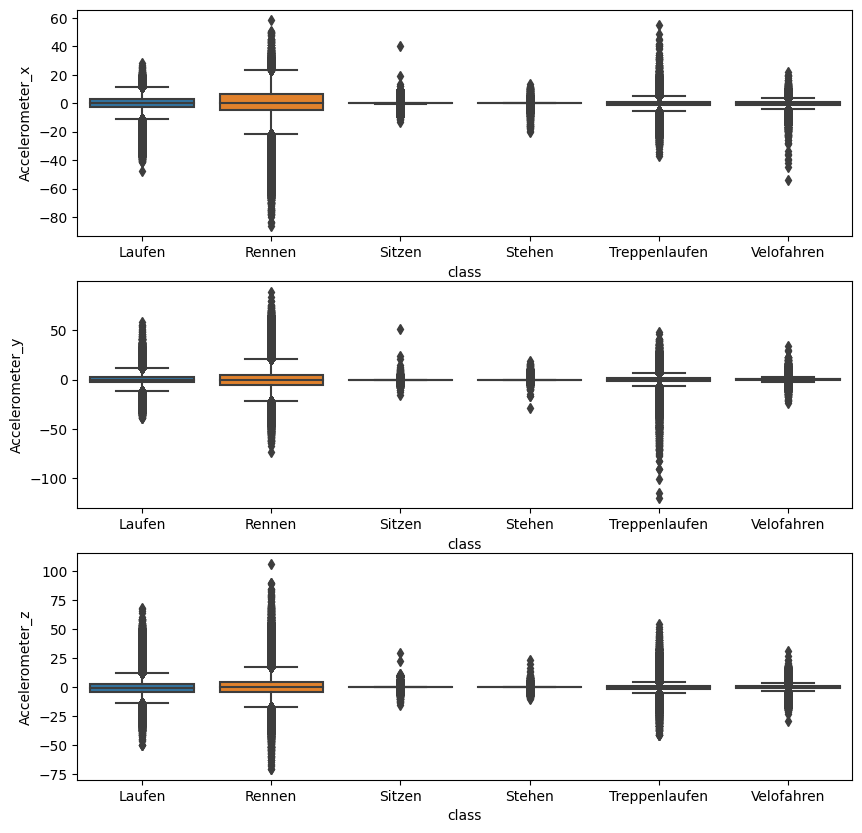

In [11]:
# make three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
sns.boxplot(x='class', y='Accelerometer_x', data=df, ax=ax1)
sns.boxplot(x='class', y='Accelerometer_y', data=df, ax=ax2)
sns.boxplot(x='class', y='Accelerometer_z', data=df, ax=ax3)

# show the plot
plt.show()


In [33]:
# function to plot the sensor data
def plot_sensor(df, sensor='Accelerometer', title='Alle Daten'):
    '''
    sensor = 'Accelerometer' or 'Gyroscope' or 'Magnetometer' or 'Orientation'
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    if sensor == 'Orientation':
        sns.boxplot(x='class', y=sensor + '_qx', data=df, ax=ax1)
        sns.boxplot(x='class', y=sensor + '_qy', data=df, ax=ax2)
        sns.boxplot(x='class', y=sensor + '_qz', data=df, ax=ax3)
    else:
        sns.boxplot(x='class', y=sensor + '_x', data=df, ax=ax1)
        sns.boxplot(x='class', y=sensor + '_y', data=df, ax=ax2)
        sns.boxplot(x='class', y=sensor + '_z', data=df, ax=ax3)
    fig.suptitle(sensor + ' ' + title)
    plt.tight_layout()
    plt.setp(ax1.get_xticklabels(), rotation=45)
    plt.setp(ax2.get_xticklabels(), rotation=45)
    plt.setp(ax3.get_xticklabels(), rotation=45)
    plt.show()

# make list of all sensors
all_sensors = ['Accelerometer', 'Gyroscope', 'Magnetometer', 'Orientation']

In [ ]:
# plot all sensors
for sensor in all_sensors:
    plot_sensor(df, sensor=sensor)

In [23]:
# filter the data on user == Ben_Tran
df_ben = df[df['user'] == 'Ben_Tran']
display(df_ben.head())

# filter the data on user == Gabriel_Torres
df_gabriel = df[df['user'] == 'Gabriel_Torres']
display(df_gabriel.head())

,Unnamed: 0,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
0,1,2023-02-27 15:02:17.156,0.000,9.722,1.278,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.21775,-0.719579,0.631111,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
1,2,2023-02-27 15:02:31.574,-0.728,9.779,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,-0.42065,0.568356,-0.598058,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
2,3,2023-02-27 15:02:16.685,0.000,0.000,0.000,0.0,0.0,0.0,0.000000,43.5,-13.143750,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
3,4,2023-02-27 15:02:32.295,0.000,0.000,0.000,0.0,0.0,0.0,-13.012501,0.0,20.587502,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen
4,5,2023-02-27 15:02:33.285,0.000,0.000,0.000,0.0,0.0,0.0,-22.612501,0.0,20.268751,0.00000,0.000000,0.000000,01_SamsungA22-2023-02-27_15-02-03,Ben_Tran,Laufen,01_SamsungA22-2023-02-27_15-02-03Ben_TranLaufen


,Unnamed: 0,time,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Orientation_qx,Orientation_qy,Orientation_qz,id,user,class,id_combined
48858,53911,2023-02-23 17:00:34.397,0.550319,-1.281488,0.226031,0.744445,-0.706854,-0.637591,1.696217,-51.602867,-8.583054,-0.620842,0.238000,-0.141863,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
48859,53912,2023-02-23 17:00:34.407,0.944033,2.140067,0.009051,0.780291,-0.396729,-0.516007,1.808224,-51.749489,-8.150375,-0.624680,0.237639,-0.139115,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
48860,53913,2023-02-23 17:00:34.417,1.640152,0.965561,-0.010259,0.764055,-0.474354,-0.547985,2.056381,-52.079834,-7.844223,-0.628399,0.236936,-0.136902,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
48861,53914,2023-02-23 17:00:34.427,1.956851,-0.833580,0.804928,0.797792,-0.700352,-0.683836,2.329872,-52.260269,-7.561409,-0.632357,0.236648,-0.133770,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...
48862,53915,2023-02-23 17:00:34.437,0.778156,-1.687740,-0.166946,0.805876,-0.710112,-0.670803,2.556515,-52.458702,-7.078743,-0.636543,0.236465,-0.129988,01_iPhone13ProMax-2023-02-23_17-00-29,Gabriel_Torres,Laufen,01_iPhone13ProMax-2023-02-23_17-00-29Gabriel_T...


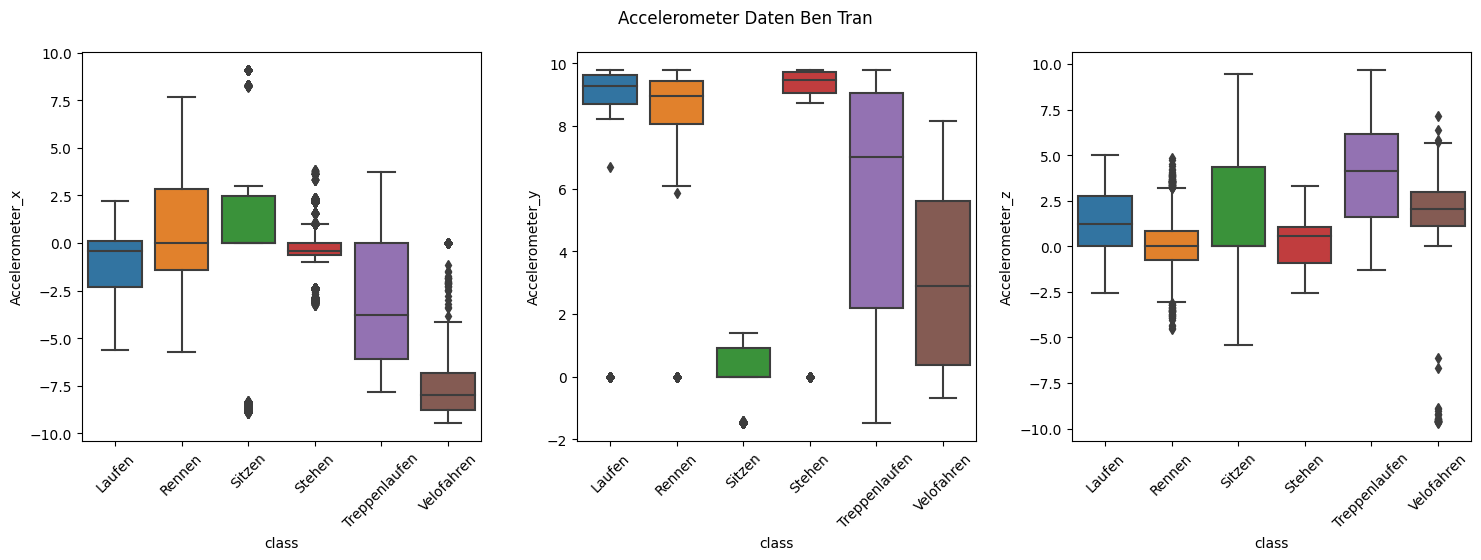

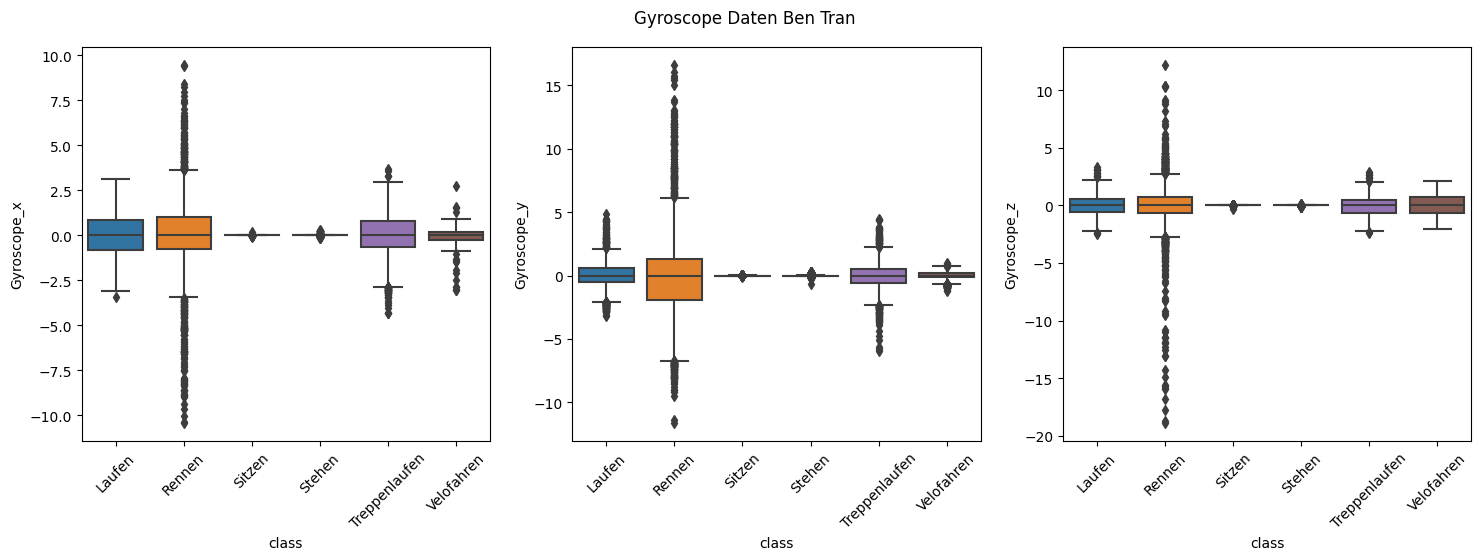

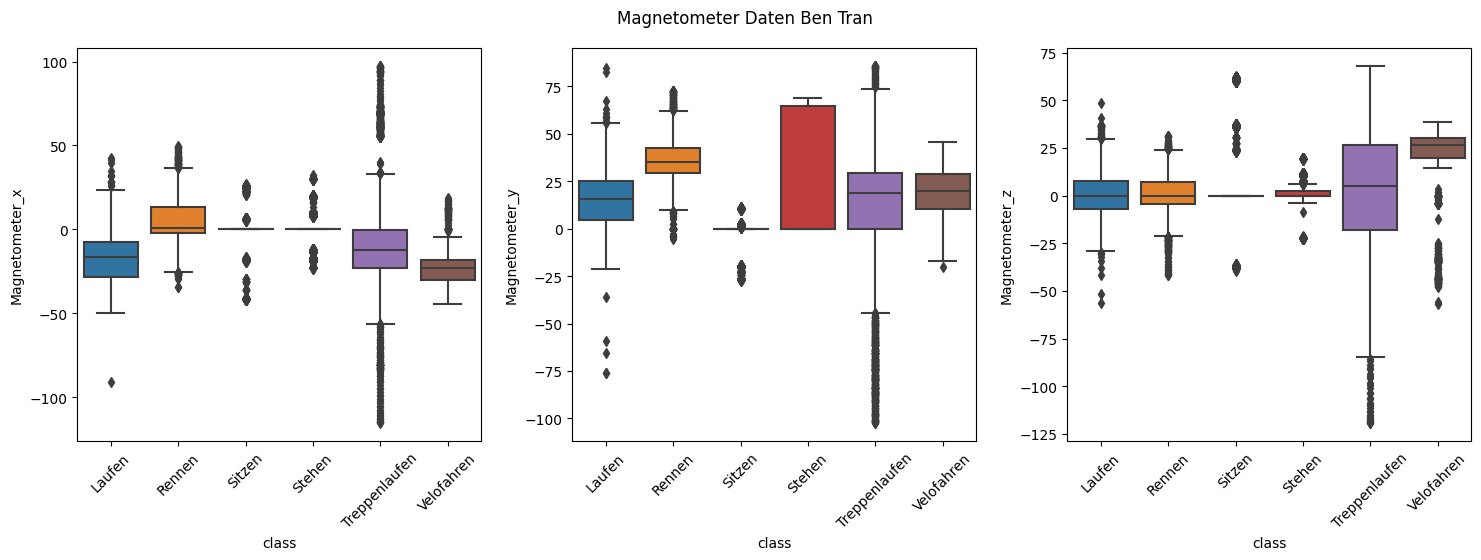

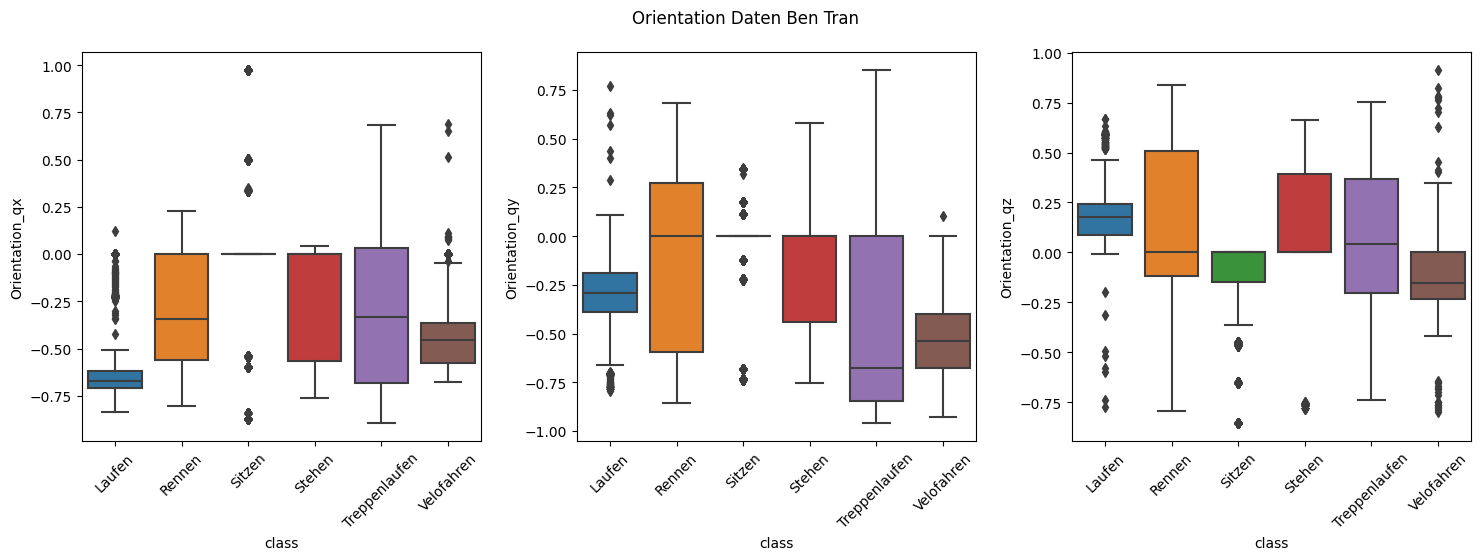

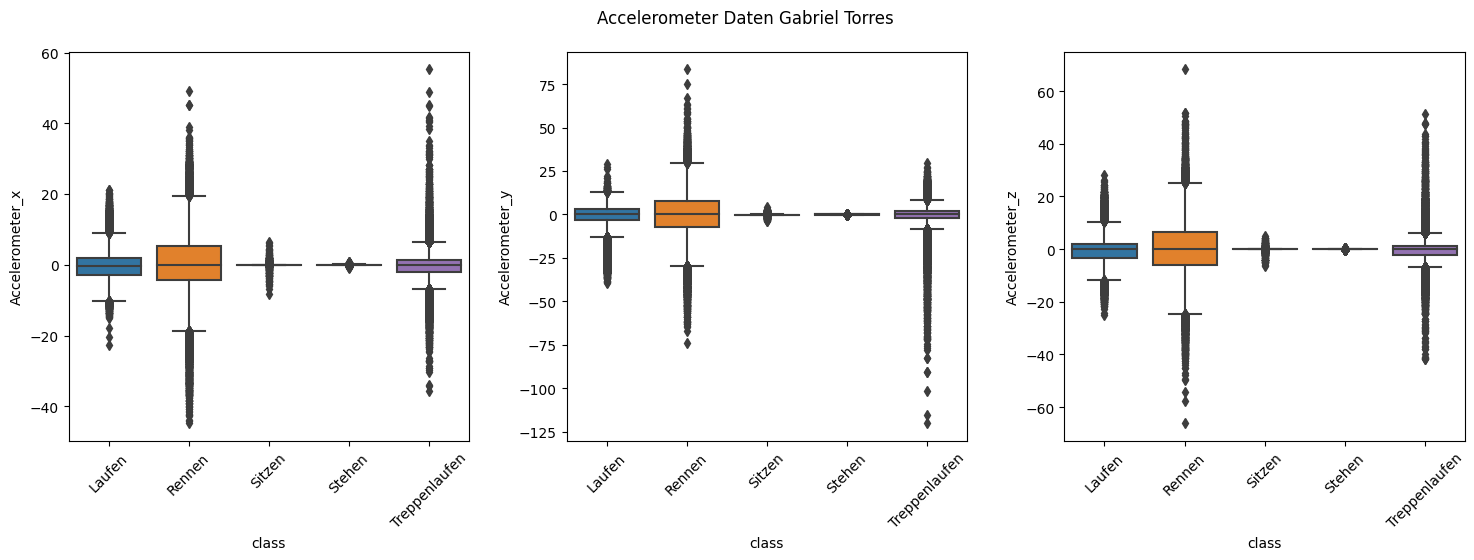

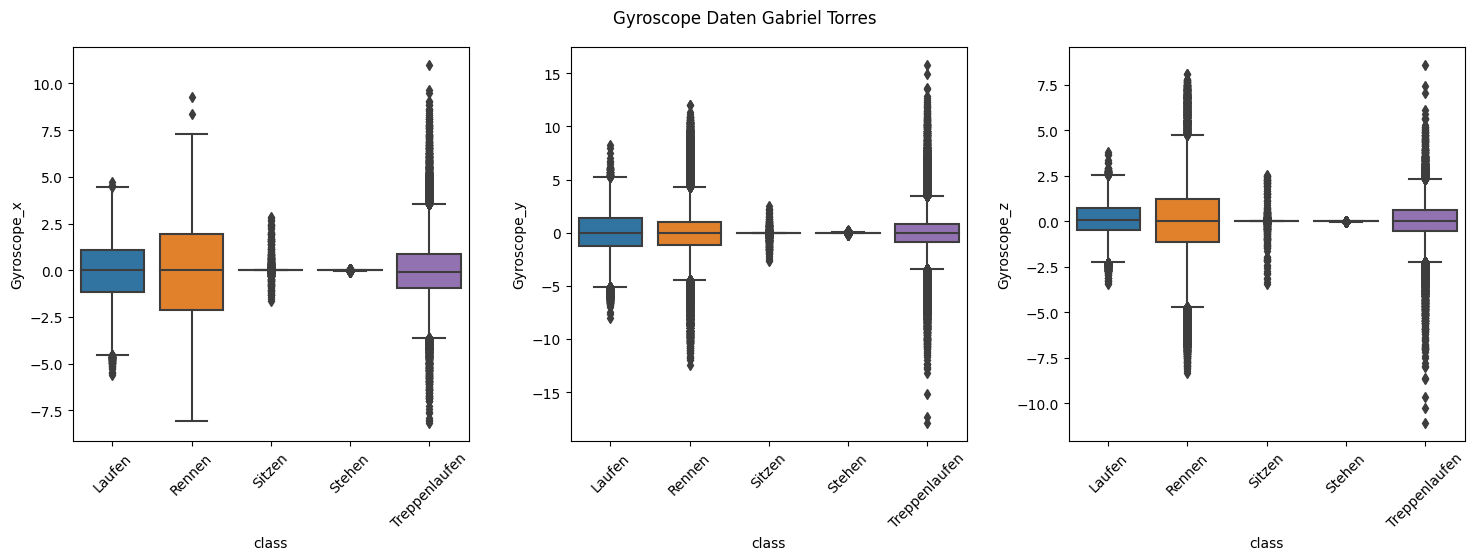

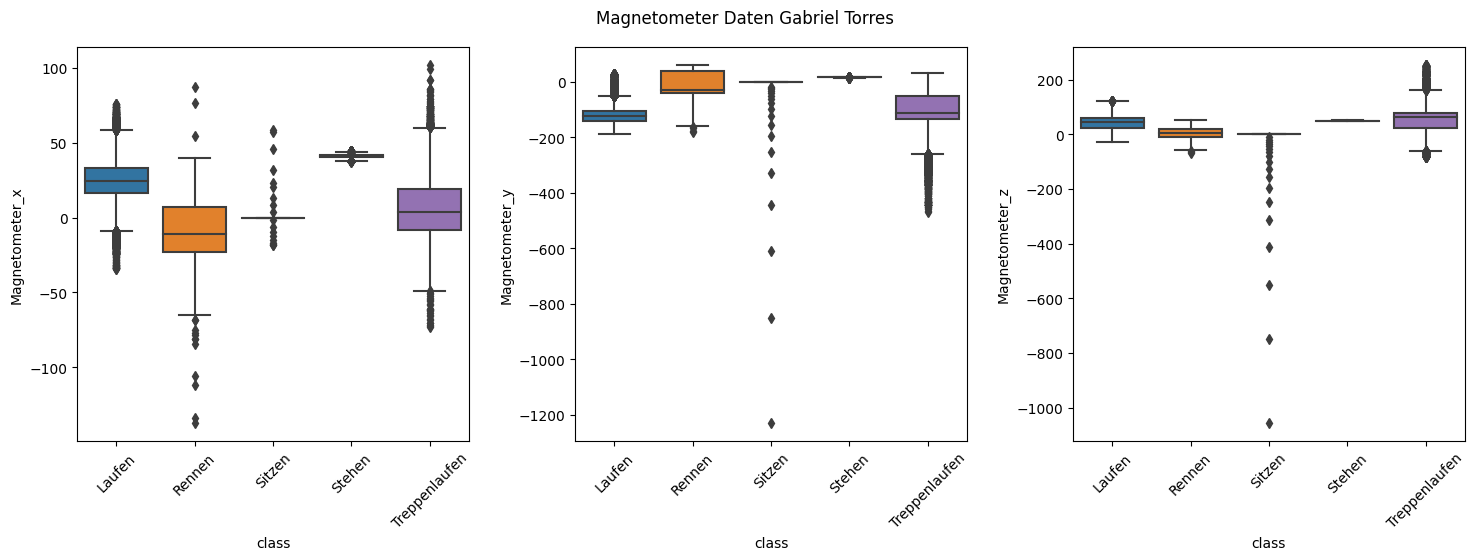

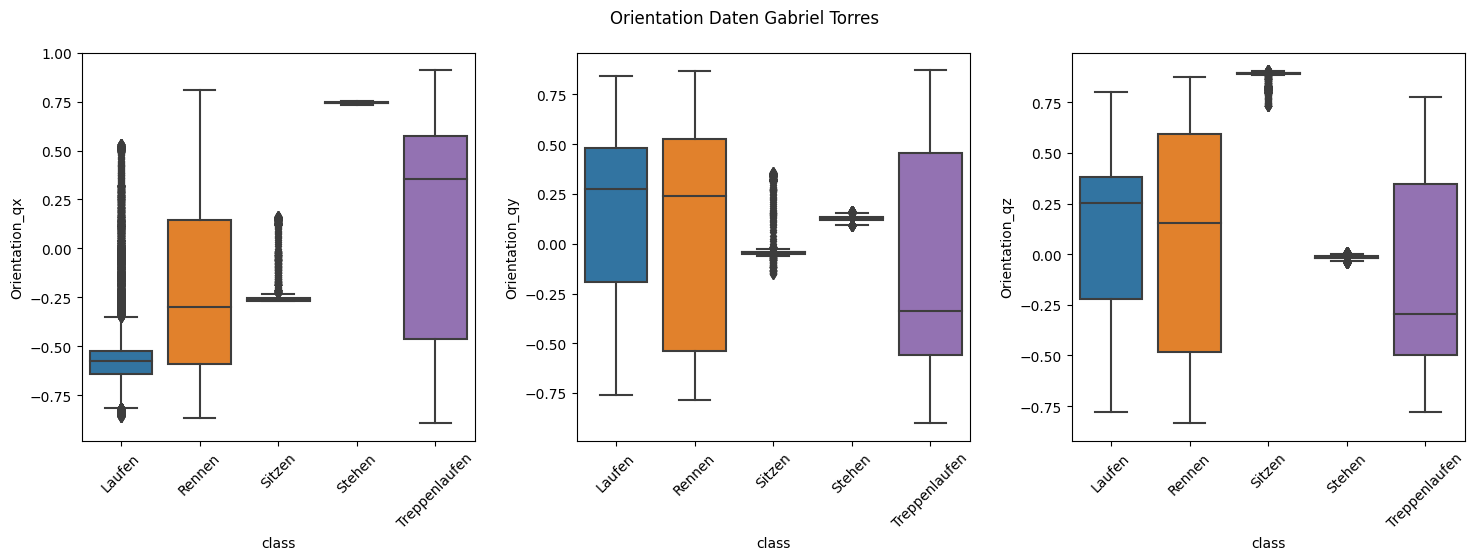

In [34]:
# plot all sensors for Ben
for sensor in all_sensors:
    plot_sensor(df_ben, sensor=sensor, title='Daten Ben Tran')

# plot all sensors for Gabriel
for sensor in all_sensors:
    plot_sensor(df_gabriel, sensor=sensor, title='Daten Gabriel Torres')